# Phase locking region

(from book, ch.4 pp.2--5)


For a Hopf-bifuctaion for a sinusoidal forcing:

$$
\dot{z} = z(\alpha + j\omega + \beta_1 |z|^2) + Fe^{j\theta}
$$

In polar form (for $z = r e^{j\phi}$, $\dot{\phi} = \omega$):


$$
\dot{r} = \alpha r + \beta_1 r^3 + F \cos \psi \\
\dot{\psi} = \Omega - \frac{F}{r}\sin\psi
$$
where $\dot{\theta} = \omega_0$, $\psi = \phi-\theta$ and $\Omega = \omega - \omega_0$

In [112]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyroots  # the coefficients must be supplied in increasing order



a = 1.0  # alpha > 0
b1 = -1.0 # beta1 < 0

F = 0.2  # > 0

# r = np.arange(0,1,0.01)  # actually is r^*
# phi = np.arange(-np.pi, np.pi, np.pi/180)  # actually is \phi^*

# tau = alpha + 3*beta1*r**2-(F/r)*np.cos(phi)
# Delta = -(alpha+3*beta1*r**2)*(F/r)*np.cos(phi)+((F/r)*np.sin(phi))**2
 

    
# ch.4 p 9 (eq.4.7)
rc2 = polyroots([-(F**2), a**2, 2*a*b1, 2*b1])  # r_c^{2}
# rc2 = np.roots([2*b1, 2*a*b1, a**2, -(F**2) ])
print rc2



# rr = np.linspace(-2, 1, 500)
# plt.plot(rr,-(F**2) + rr*(a**2) + (rr**2) * (2*a*b1) + (rr**3) * (2*b1))
# plt.grid(True)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[-1.37438661  0.04405216  0.33033445]


(0, 0.20000000000000001)

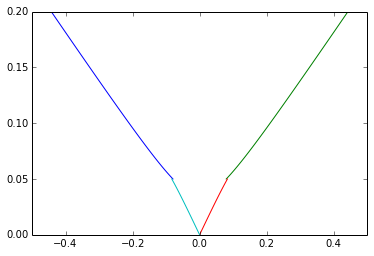

In [128]:
a = 1.0  # alpha > 0
b1 = -100.0 # beta1 < 0

Fmax = 0.2

Fsn = np.sqrt(-a**3/(4*b1))

FH = np.linspace(Fsn,Fmax,100)
BH = np.sqrt(-(2*b1*FH**2/a)-(a**2/4))

FSN = np.linspace(0,Fsn,50)
BSN = []
for Ftmp in FSN:
    rcl2 = polyroots([Ftmp**2, 0, 2*a*b1, 2*b1**2])
    # print rcl2
    # which one should I pick? for now go with max
    rcl2 = rcl2[np.imag(rcl2) < 1e-20]
    rcl2 = max(rcl2[rcl2>0])
    BSN.append(np.sqrt(-(a+3*b1*rcl2)*(a+b1*rcl2)))
BSN = np.array(BSN)
    
TWOPI = 2*np.pi
plt.plot(-BH/TWOPI , FH )
plt.plot( BH/TWOPI , FH )
plt.plot( BSN/TWOPI, FSN)
plt.plot(-BSN/TWOPI, FSN)


plt.ylim((0,max(FH)))
